<a href="https://colab.research.google.com/github/PuttupuR/My-Project/blob/main/Laptop_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/laptop_price.csv", encoding='latin-1')
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [5]:
df.shape

(1303, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
df.drop(columns=['laptop_ID'],inplace= True)
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [10]:
df['Ram']= df['Ram'].str.replace('GB','')
df['Weight']= df['Weight'].str.replace('kg','')

In [11]:
df.tail(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2,369.0


In [12]:
df['Ram']= df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


<ipython-input-14-c9d03b54db19>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

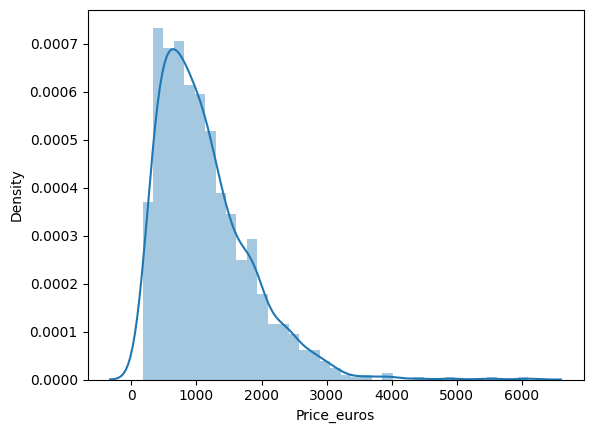

In [14]:
import seaborn as sns
sns.distplot(df['Price_euros'])

<Axes: >

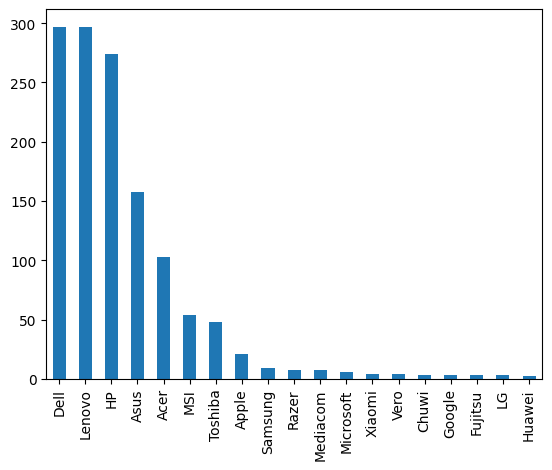

In [15]:
df['Company'].value_counts().plot(kind='bar')

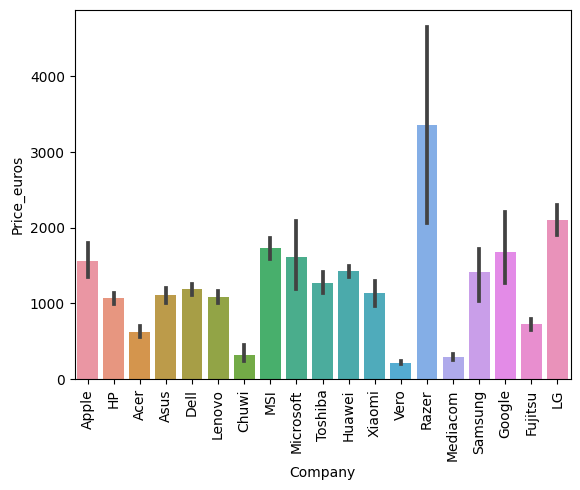

In [16]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

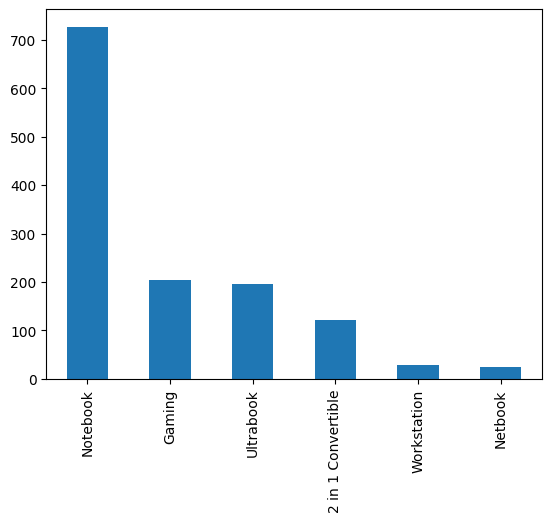

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

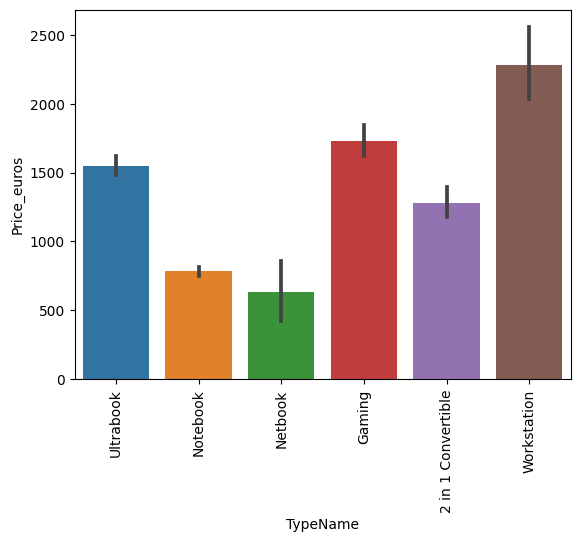

In [18]:
import matplotlib.pyplot as plt
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-19-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

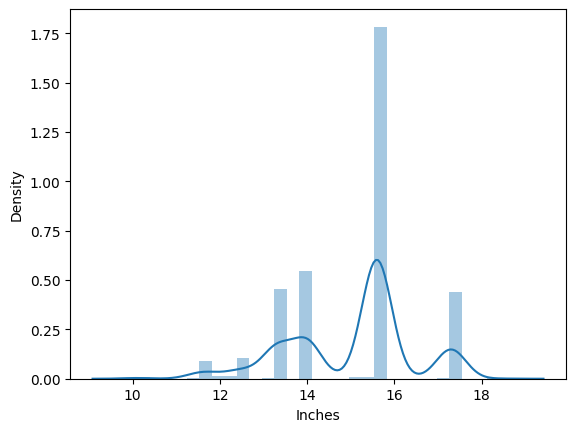

In [19]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price_euros'>

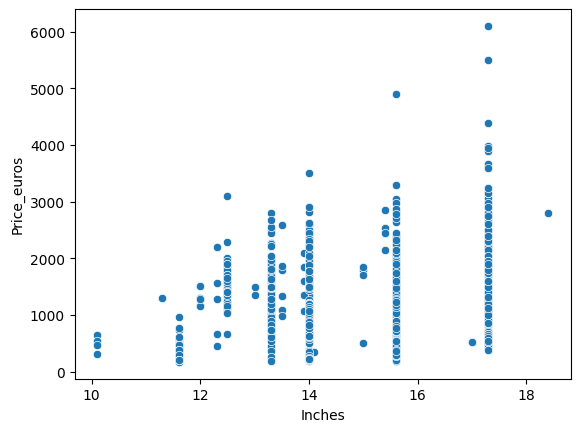

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

In [21]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
529,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,1377.0,0
103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,1119.0,0
1011,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,1539.0,0
46,Lenovo,IdeaPad 320-15ISK,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,No OS,2.20,369.0,0
874,Samsung,Notebook 9,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23,1849.0,0


<Axes: >

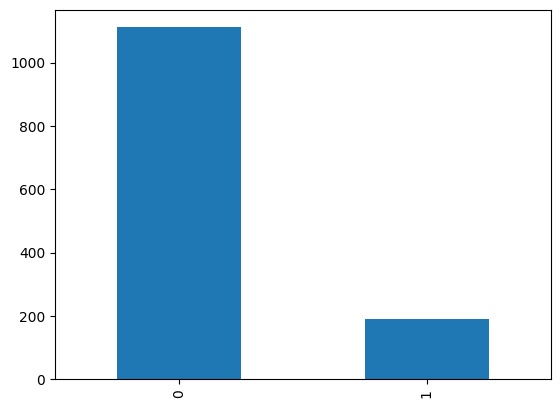

In [24]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

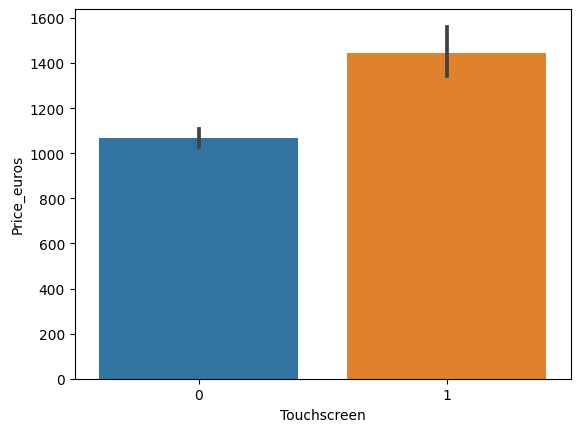

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [26]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
1035,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,1349.0,0,0
1214,Asus,ROG Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.90,1949.0,0,0
398,Dell,Precision M5520,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,2712.0,1,0
629,Dell,XPS 15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,1820.0,0,0
613,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.25,359.0,0,0


<Axes: >

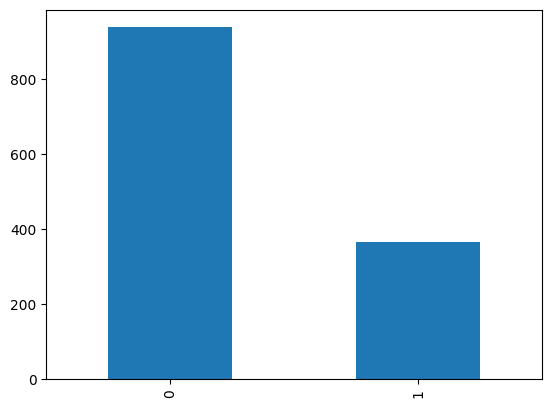

In [28]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price_euros'>

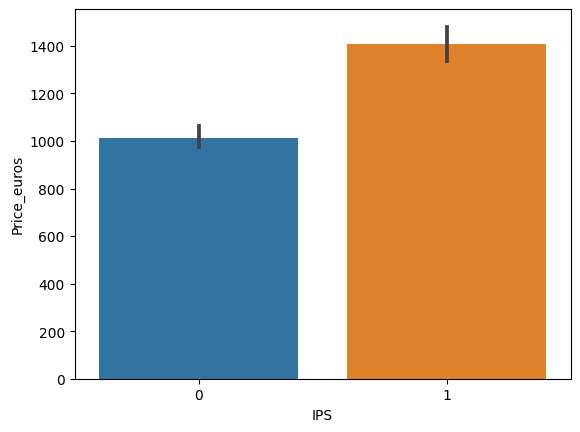

In [29]:
sns.barplot(x=df['IPS'],y=df['Price_euros'])

In [30]:
new = df['ScreenResolution'].str.split('x',n=1,expand = True)

In [31]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [32]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
786,MSI,GL62M (i5-7300HQ/8GB/1TB,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1089.00,0,0,Full HD 1920,1080
260,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,1142.00,0,0,Full HD 1920,1080
306,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,1975.00,1,0,Full HD / Touchscreen 1920,1080
715,Lenovo,Thinkpad E470,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87,857.07,0,1,IPS Panel Full HD 1920,1080
318,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,980.00,0,0,Full HD 1920,1080


In [33]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r"(\d+\.?\d+)").apply(lambda x:x[0])

In [34]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   object 
 15  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64

In [36]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

In [38]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()['Price_euros']
print(correlation_matrix)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64


In [39]:
df['PPI'] =(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
 16  PPI               1303 non-null   float64


In [41]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()['Price_euros']
print(correlation_matrix)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64


In [42]:
df.drop(columns=['Inches','X_res','Y_res','ScreenResolution'],inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price_euros  1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  PPI          1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


In [44]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [45]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [47]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [48]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [49]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

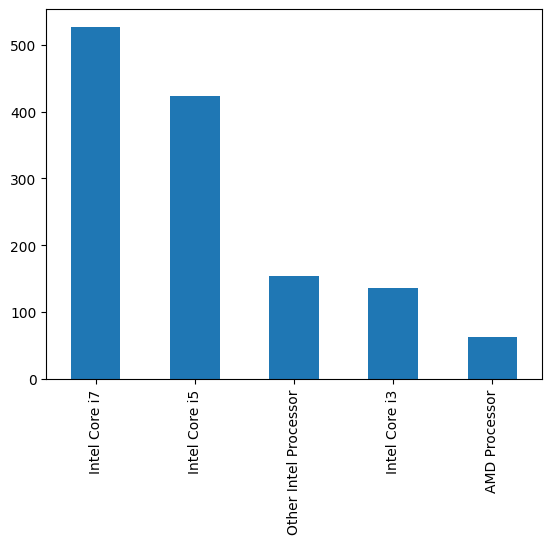

In [50]:
df['Cpu brand'].value_counts().plot(kind='bar')

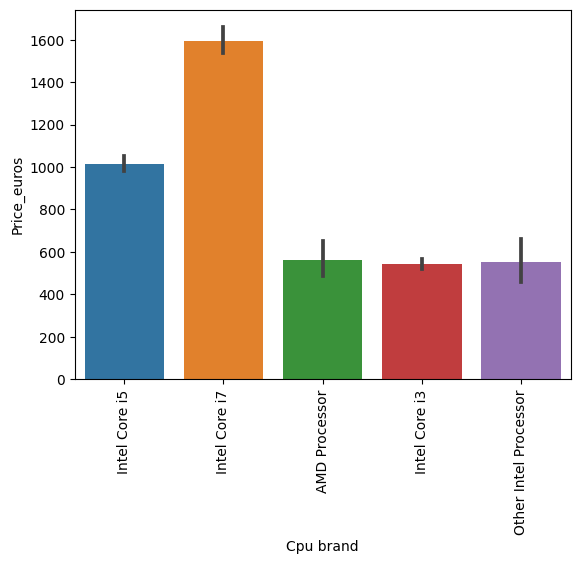

In [51]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

<Axes: >

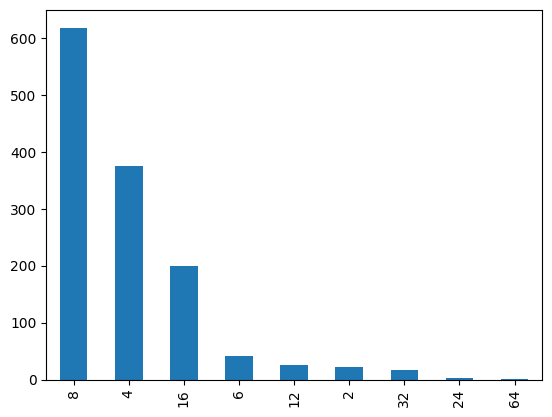

In [53]:
df['Ram'].value_counts().plot(kind='bar')

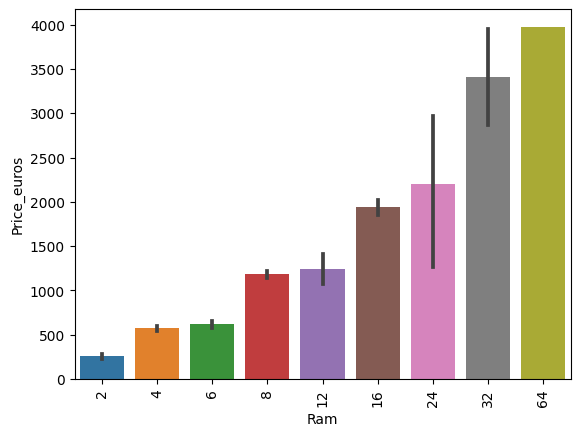

In [54]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [56]:
print(df['Memory'].unique())


['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


In [57]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0]
df["first"] = df["first"].str.strip()

df["second"] = new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.extract('(\d+)').fillna(0).astype(int)
df['second'] = df['second'].str.extract('(\d+)').fillna(0).astype(int)

df["Layer2HDD"] = 0  # Create Layer2HDD column and initialize it with 0
df["Layer2SSD"] = 0  # Create Layer2SSD column and initialize it with 0
df["Layer2Hybrid"] = 0  # Create Layer2Hybrid column and initialize it with 0
df["Layer2Flash_Storage"] = 0  # Create Layer2Flash_Storage column and initialize it with 0

df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])


In [58]:
df.drop(
    columns=[
        "first",
        "second",
        "Layer1HDD",
        "Layer1SSD",
        "Layer1Hybrid",
        "Layer1Flash_Storage",
        "Layer2HDD",
        "Layer2SSD",
        "Layer2Hybrid",
        "Layer2Flash_Storage",
    ],
    inplace=True
)


In [59]:
df.sample(5)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
6,Apple,MacBook Pro,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1,220.534624,Intel Core i7,0,0,0,256
400,Lenovo,IdeaPad 320-15IAP,Notebook,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.20,306.00,0,0,100.454670,Other Intel Processor,1000,0,0,0
253,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,8,512 SSD,Intel UHD Graphics 620,Windows 10,1.37,1849.00,1,1,158.482530,Intel Core i7,0,512,0,0
1173,Lenovo,V110-15ISK (i5-6200U/4GB/500GB/No,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,2.10,398.00,0,0,100.454670,Intel Core i5,500,0,0,0
1238,MSI,GL62 6QF,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.30,1169.00,0,0,141.211998,Intel Core i7,0,128,0,0


In [60]:
df.drop(columns=['Memory'],inplace=True)

In [61]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [62]:
# Assuming you have numeric values in the "HDD", "SSD", "Hybrid", and "Flash_Storage" columns
df["HDD"] = pd.to_numeric(df["HDD"], errors='coerce')
df["SSD"] = pd.to_numeric(df["SSD"], errors='coerce')
df["Hybrid"] = pd.to_numeric(df["Hybrid"], errors='coerce')
df["Flash_Storage"] = pd.to_numeric(df["Flash_Storage"], errors='coerce')


numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()['Price_euros']
print(correlation_matrix)

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.380428
SSD              0.676202
Hybrid          -0.040147
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64


In [63]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price_euros  1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
 12  HDD          1303 non-null   int64  
 13  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(6)
memory usage: 132.5+ KB


In [65]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [66]:
print(df['Gpu'].unique())

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Intel HD Graphics 400'
 'Nvidia GeForce GTX 1050' 'AMD Radeon R2' 'AMD Radeon 530'
 'Nvidia GeForce 930MX' 'Intel HD Graphics' 'Intel HD Graphics 500'
 'Nvidia GeForce 930MX ' 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Nvidia GeForce MX130' 'AMD R4 Graphics'
 'Nvidia GeForce GTX 940MX' 'AMD Radeon RX 560' 'Nvidia GeForce 920M'
 'AMD Radeon R7 M445' 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M'
 'Intel HD Graphics 515' 'AMD Radeon R5 M420' 'Intel HD Graphic

In [67]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [68]:
df.head(2)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel


In [69]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [70]:
df[df['Gpu brand'] == 'ARM']

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,1,1,234.5074,AMD Processor,0,0,ARM


In [71]:
df = df[df['Gpu brand'] != 'ARM']

In [72]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

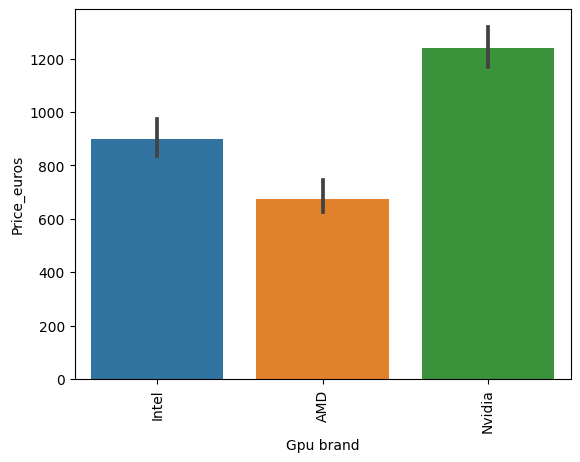

In [73]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
df.drop(columns = ['Gpu'],inplace=True)

In [75]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

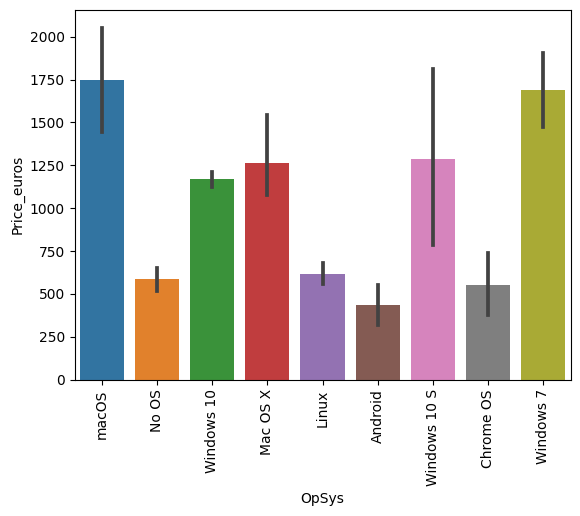

In [76]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [78]:
df['os'] = df['OpSys'].apply(cat_os)

In [79]:
df.drop(columns=['OpSys'],inplace=True)

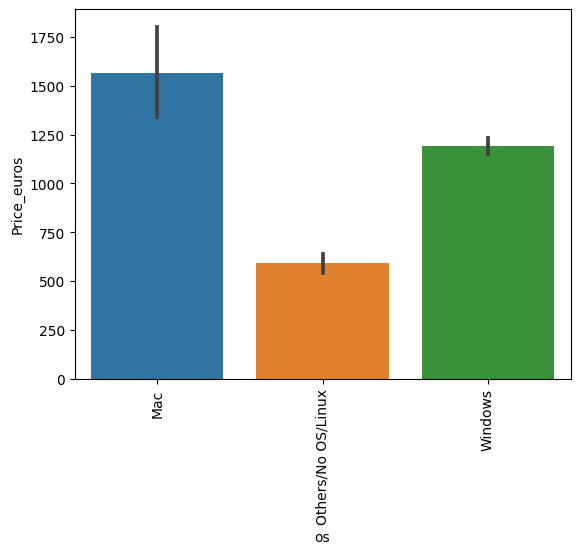

In [80]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-81-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

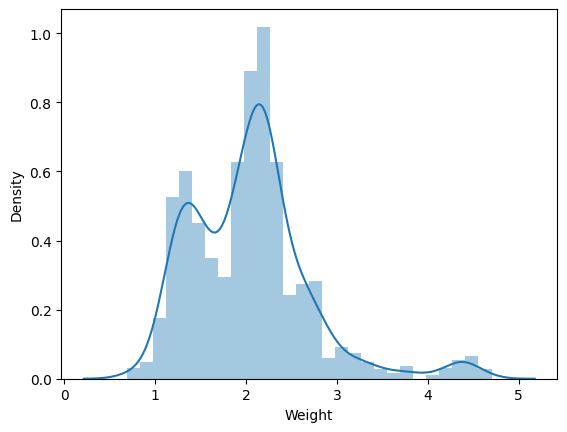

In [81]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

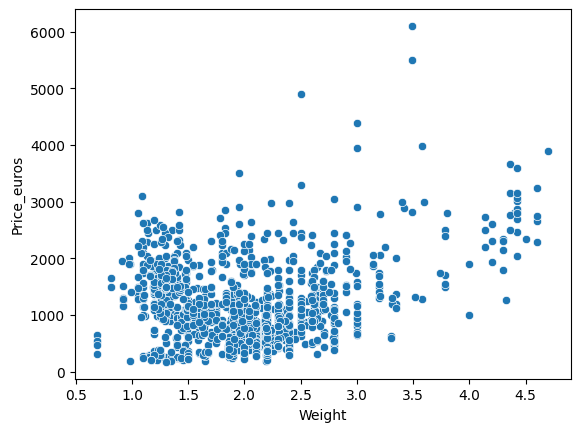

In [82]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [83]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()['Price_euros']
print(correlation_matrix)

Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.380836
SSD            0.676066
Name: Price_euros, dtype: float64


<Axes: >

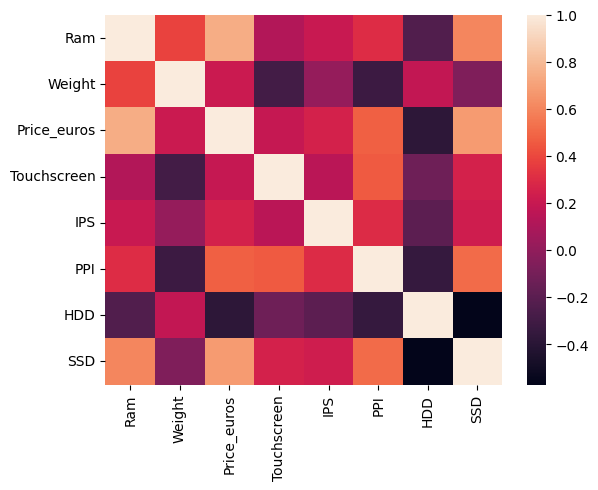

In [84]:
sns.heatmap(numeric_columns.corr())

<ipython-input-85-7250b54c5333>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

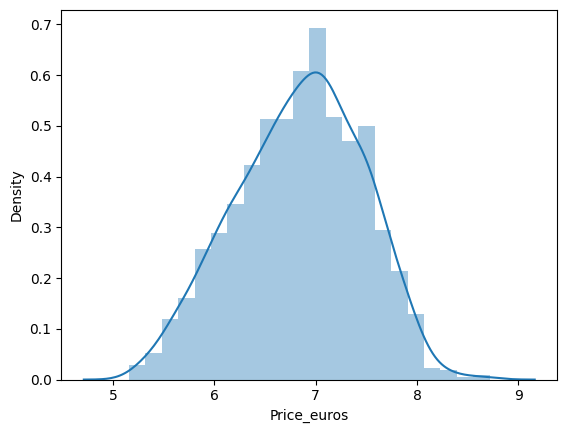

In [85]:
sns.distplot(np.log(df['Price_euros']))

In [86]:
df['Product'].value_counts()

XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
SmartBook 130                            1
A541NA-GO342 (N3350/4GB/500GB/Linux)     1
17-X047na (i3-6006U/8GB/1TB/W10)         1
V310-15ISK (i5-6200U/4GB/1TB/FHD/No      1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
Name: Product, Length: 617, dtype: int64

<Axes: >

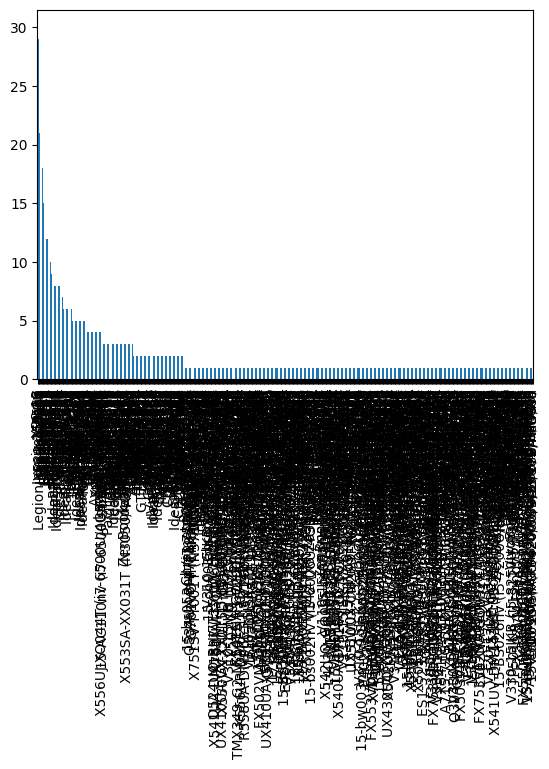

In [87]:
df['Product'].value_counts().plot(kind='bar')

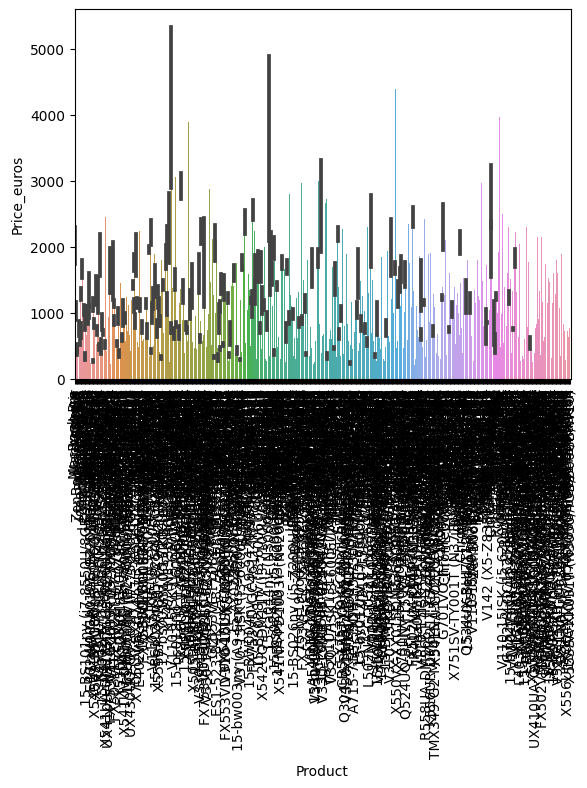

In [88]:
sns.barplot(x=df['Product'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [89]:
X = df.drop(columns=['Price_euros','Product'])
y = np.log(df['Price_euros'])

In [90]:
X.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [91]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [93]:
!pip install xgboost


In [94]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [95]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    LinearRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8102205193026736
MAE: 0.2085356326304542


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    LinearRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8102205193026736
MAE: 0.2085356326304542


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    Ridge(alpha=10)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8144791052835672
MAE: 0.208090886175621


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [98]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    Lasso(alpha=0.001)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8099725125831072
MAE: 0.20980232163820187


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    KNeighborsRegressor(n_neighbors=3)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8128607336486162
MAE: 0.19231406087793287


In [100]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    DecisionTreeRegressor(max_depth=8)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8190193600983415
MAE: 0.1937192518718058


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [101]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    SVR(kernel='rbf',C=10000,epsilon=0.1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.829332664798763
MAE: 0.1966334726334764


In [102]:

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8842022531941367
MAE: 0.15995587498703007


In [103]:
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    AdaBoostRegressor(n_estimators=15, learning_rate=1.0)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.803207088619309
MAE: 0.22445711695214854


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [104]:
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    GradientBoostingRegressor(n_estimators=500)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8817853441832839
MAE: 0.15773096459406197


In [105]:
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8792682124043759
MAE: 0.16092439015778762


In [106]:
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

pipeline = make_pipeline(
    column_transformer,
    XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8792682124043759
MAE: 0.16092439015778762


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
!pip install mlxtend

In [108]:
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Define X_train, y_train, X_test, y_test with your actual training and test data

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
    remainder='passthrough'
)

# Define the individual regressor models
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=10)

# Create the voting regressor with the estimators and their respective weights
voting_regressor = VotingRegressor(
    estimators=[
        ('rf', rf),
        ('gbdt', gbdt),
        ('et', et)
    ],
    weights=[5, 1, 1]
)

pipeline = make_pipeline(column_transformer, voting_regressor)

pipeline.fit(X_train, y_train.ravel())  # Reshape y_train to a 1D array
y_pred = pipeline.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8889405175053501
MAE: 0.15798683731103222
